<div style="float:left;"><img src="files/logo.png" alt="alt text" title="image Title" width="250"/></div>


# <center>Analysez les ventes d'une librairie avec R ou Python</center>

# Sommaire :
**Partie 1 : Importation et inspection des données**
- <a href="#C1">Importation des données</a>
 
**Partie 2 : Nettoyage des jeux de données**
- <a href="#C2">1.Erreurs de types</a>
- <a href="#C3">2.Valeurs manquantes</a>
- <a href="#C4">3.Doublons</a>

**Partie 3 : Jointure**
- <a href="#C5">1.Jointure customer et transaction</a> 
- <a href="#C6">2.Jointure customer_transaction et product</a> 
- <a href="#C7">3.Détermination du prix du produit dont id_prod est 0_2245 </a> 


In [1]:
# Import des librairies.
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re


## **Partie 1 : Importation et inspection des données**
### <a name="C1">Importation des données</a>

In [2]:
customer = pd.read_csv('customers.csv')
product = pd.read_csv('products.csv')
transaction = pd.read_csv('transactions.csv')

In [3]:
# Afficher les 5 premières lignes de la DataFrame customers
customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Dimensions de la DataFrame customer
customer.shape

(8623, 3)

In [5]:
# Informations sur les données
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# Afficher les 5 premières lignes de la DataFrame product
product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
# Dimensions de la DataFrame product
product.shape

(3287, 3)

In [8]:
# Informations sur les données
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [9]:
product['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [10]:
product.loc[product['price'] == product.price.min()]

,id_prod,price,categ
731,T_0,-1.0,0


In [11]:
# Afficher les 5 premières lignes de la DataFrame transaction
transaction.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [12]:
# Dimensions de la DataFrame transaction
transaction.shape

(679532, 4)

In [13]:
# Informations sur les données
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


## **Partie 2 : Nettoyage des jeux de données**

 On va trouver les erreures qui sont glissées  et proposer des solutions adéquates pour les gérer.

### <a name="C2">1. Erreurs de type</a>



In [14]:
# vérifier les types des colonnes de la DataFrame customer
customer.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [15]:
# vérifier les types des colonnes de la DataFrame product
product.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

En regardant le résultat de la méthode dtypes on se rend compte que la variable 'categ' n'a pas le bon type : 'categ' a été importée en int, alors qu'il s'agit d'une variable qualitative.
On va donc modifier le type de 'categ' pour la mettre en string ou category.

In [16]:
 # Convertir en type category la variable qualitative 'categ'
product['categ'] = product['categ'].astype("category")

In [17]:
# vérifier les types des colonnes de la DataFrame transaction
transaction.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

La variable date n'est pas considérée comme une date. 

In [18]:
# chercher les transactions qui correspondent à des tests
df_test = transaction.loc[transaction['date'].str.startswith("test_")]
df_test.head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


In [19]:
# identifier les comptes de test
df_test['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

In [20]:
# identifier les 'id_prod' test
df_test['id_prod'].unique()

array(['T_0'], dtype=object)

In [21]:
# supprimer les tests
df_test = df_test.index
for index in df_test :
    transaction.drop(index, inplace = True)

In [22]:
# supprimer les product_test
product_test = product.loc[product['id_prod'] == 'T_0', :].index
for index in product_test :
    product.drop(index, inplace = True)

In [23]:
# supprimer les compte_test
compte_test = customer.loc[(customer['client_id'] == 'ct_0') | (customer['client_id'] == 'ct_1')].index
for index in compte_test :
    customer.drop(index, inplace = True)

In [24]:
# convertir en datetime la variable 'date'
transaction['date'] = pd.to_datetime(transaction['date'])

### <a name="C3">2. Valeurs manquantes</a>

On va ensuite vérifier si les jeux de données contiennent des valeurs manquantes :

In [25]:
#Calcul de la somme des valeurs manquantes pour chacune des variables de la DataFrame customer
customer.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [26]:
#Calcul de la somme des valeurs manquantes pour chacune des variables de la DataFrame product
product.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [27]:
#Calcul de la somme des valeurs manquantes pour chacune des variables de la DataFrame transaction
transaction.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

### <a name="C4">3. Doublons</a> 

In [28]:
# calcul du nombre des lignes dupliquées 
customer.duplicated('client_id').sum()

0

In [29]:
# calcul du nombre des lignes dupliquées
product.duplicated('id_prod').sum()

0

In [30]:
# calcul du nombre des lignes dupliquées
transaction.duplicated(transaction.columns).sum()

0

## Partie 3 : Jointure 

### <a name="C5">1.Jointure customer et transaction</a> 

In [31]:
# jointure externe
customer_transaction = pd.merge(customer, transaction, on = 'client_id', how = 'outer', indicator = True)
customer_transaction.head()

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both


In [32]:
# vérification de la jointure
customer_transaction[customer_transaction['_merge'] != 'both'].head()

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaT,NaN,left_only
200286,c_3789,f,1997,NaN,NaT,NaN,left_only
218173,c_4406,f,1998,NaN,NaT,NaN,left_only
220388,c_2706,f,1967,NaN,NaT,NaN,left_only
225538,c_3443,m,1959,NaN,NaT,NaN,left_only


On a des clients inscrits sur notre site qui n'ont pas généré des transactions. On va les stocker dans une DataFrame et les supprimer de customers_transactions

In [33]:
# stocker les clients qui n'ont pas fait des achats et recupérer d'index
df_customer = customer_transaction[customer_transaction['_merge'] != 'both'].index
# suppression des clients qui n'ont pas effectué d'achat
for index in df_customer :
    customer_transaction.drop(index, inplace = True)

In [34]:
customer_transaction.shape

(679332, 7)

In [35]:
# vérification de la suppression des clients qui n'ont pas fait d'achat
customer_transaction[customer_transaction['_merge'] != 'both']

,client_id,sex,birth,id_prod,date,session_id,_merge


In [36]:
# suppression de la colonne'_merge' 
customer_transaction.drop(columns=['_merge'],inplace=True)


In [37]:
# vérification de la Clé
customer_transaction.loc[customer_transaction[['session_id','client_id', 'date']].duplicated(keep=False),:]
 

,client_id,sex,birth,id_prod,date,session_id


### <a name="C6">2.Jointure customer_transaction et product</a> 

In [38]:
# Jointure externe
customer_transaction_product = pd.merge(customer_transaction, product, on = 'id_prod', how = 'outer', indicator = True)
customer_transaction_product.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0,both
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0,both
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0,both
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0,both
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0,both


In [39]:
# vérification de la jointure
customer_transaction_product[customer_transaction_product['_merge'] != 'both'].head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only


In [40]:
df_produit_non_vendu = customer_transaction_product[customer_transaction_product['_merge'] == 'right_only']
df_produit_non_vendu.head() 

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
679332,NaN,NaN,NaN,0_1016,NaT,NaN,35.06,0,right_only
679333,NaN,NaN,NaN,0_1780,NaT,NaN,1.67,0,right_only
679334,NaN,NaN,NaN,0_1062,NaT,NaN,20.08,0,right_only
679335,NaN,NaN,NaN,0_1119,NaT,NaN,2.99,0,right_only
679336,NaN,NaN,NaN,0_1014,NaT,NaN,1.15,0,right_only


In [41]:
# recupérer les index des produits_non_vendus
df_produit_non_vendu = df_produit_non_vendu.index
# suppression des produits qui n'ont pas été vendus
for index in df_produit_non_vendu :
    customer_transaction_product.drop(index, inplace = True)

In [42]:
customer_transaction_product[customer_transaction_product['_merge'] == 'left_only'].head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only



Ici on a des clients qui ont fait des achats de produits qu'on ne trouve pas dans la DataFrame products c'est à dire qu'on connait pas leurs prix

In [43]:
# On crée une DataFrame df_price_manquante
df_price_manquante = customer_transaction_product[customer_transaction_product['_merge'] == 'left_only']
# Déterminer les produits dont on ne connait pas le prix
df_price_manquante.id_prod.unique()


array(['0_2245'], dtype=object)

 <div class="alert alert-block alert-info">
    <b>On a un seul produit (id_prod est 0_2245) dont on a pas le prix.<br>
    On a 221 transactions pour ce produit.<br>
    Ce produit appartient à la categorie 0.</b>
</div> 

In [44]:
# suppression de la colonne'_merge' 
customer_transaction_product.drop(columns=['_merge'],inplace=True)

In [45]:
# vérification de la clé
customer_transaction_product.loc[customer_transaction_product[['session_id','client_id','date','id_prod']].duplicated(keep=False),:]

,client_id,sex,birth,id_prod,date,session_id,price,categ


In [46]:
customer_transaction_product.shape

(679332, 8)

### <a name="C5">3.Determination du prix du produit dont id_prod est 0_2245 </a> 

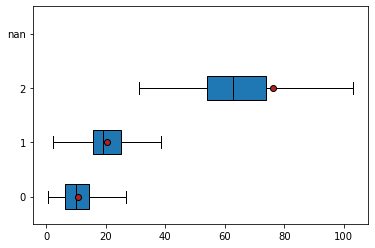

In [47]:

X = "categ" # qualitative
Y = "price" # quantitative
modalites = customer_transaction_product[X].unique()
groupes = []
for m in modalites:
    groupes.append(customer_transaction_product[customer_transaction_product[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit ici que les prix sont différents d'une catégorie à l'autre. Par exemple, les prix des produits appartenant à la catégorie 2 sont plus élevés et plus dispersés que les prix des deux autres catégories.
Cette étude nous montre que le prix dépend de la catègorie ainsi on va imputer la valeur moyenne de la catégorie 0 au prix du produit (0_2245)

In [48]:
df_categ_0 = customer_transaction_product.loc[customer_transaction_product['categ']== 0,:]
customer_transaction_product.loc[customer_transaction_product['id_prod'] == '0_2245','price'] = np.mean(df_categ_0['price'])
customer_transaction_product.loc[customer_transaction_product['id_prod'] == '0_2245','categ'] = 0

In [49]:
# vérification de l'imputation de nan dans la colonne price
customer_transaction_product.loc[customer_transaction_product['price'].isnull()]

,client_id,sex,birth,id_prod,date,session_id,price,categ


In [50]:
# convertir en csv customer_transaction_product
customer_transaction_product.to_csv(r'C:\Users\attia\customer_transaction_product.csv',index = False)